<a href="https://colab.research.google.com/github/chiusanghung/Traffic-Sign-Recognition/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
drive.mount('/content/drive',force_remount=True)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 1641 images belonging to 30 classes.
Found 96 images belonging to 30 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(64,64,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(30,activation='softmax'))

model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                        

In [ ]:
# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

In [ ]:
# Training 
history = model.fit_generator( train, validation_data=test, epochs=80, steps_per_epoch=len(train), 
                        validation_steps=len(test))



<ipython-input-5-3f57a21db6d6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator( train, validation_data=test, epochs=80, steps_per_epoch=len(train),


Epoch 1/80
52/52 [==============================] - 257s 5s/step - loss: 3.5230 - accuracy: 0.0451 - val_loss: 3.3849 - val_accuracy: 0.0625
Epoch 2/80
52/52 [==============================] - 60s 1s/step - loss: 3.2859 - accuracy: 0.0780 - val_loss: 3.2679 - val_accuracy: 0.1250
Epoch 3/80
52/52 [==============================] - 66s 1s/step - loss: 3.0441 - accuracy: 0.1353 - val_loss: 2.8725 - val_accuracy: 0.1875
Epoch 4/80
52/52 [==============================] - 61s 1s/step - loss: 2.4068 - accuracy: 0.3224 - val_loss: 2.0133 - val_accuracy: 0.5312
Epoch 5/80
52/52 [==============================] - 61s 1s/step - loss: 1.5333 - accuracy: 0.5472 - val_loss: 1.4748 - val_accuracy: 0.5833
Epoch 6/80
52/52 [==============================] - 63s 1s/step - loss: 1.1065 - accuracy: 0.6624 - val_loss: 1.1666 - val_accuracy: 0.7083
Epoch 7/80
52/52 [==============================] - 61s 1s/step - loss: 0.7864 - accuracy: 0.7453 - val_loss: 0.9832 - val_accuracy: 0.7604
Epoch 8/80
52/52 [=

In [ ]:
#Tạo file inception
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/Dataset/model.h5')
model

Test loss=  0.9933533668518066
Test accuracy=  0.8541666865348816


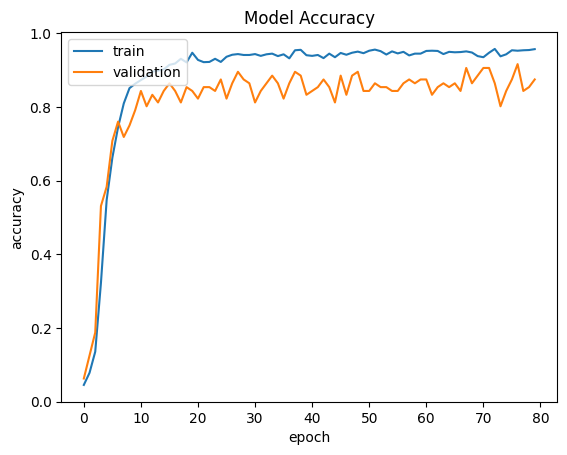

In [ ]:
import matplotlib.pyplot as plt
score = model.evaluate(test,verbose=0)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

In [ ]:

import pandas as pd
clases = pd.read_csv('/content/drive/MyDrive/testAIfinal/Dataset_trafficsignsVN/class.csv')
clases = list(clases)
clases

['Duong Cam',
 'Cam Di Nguoc Chieu',
 'Cam O To',
 ' Cam O To Re Phai',
 'Cam O To Re Trai',
 'Cam Xe May',
 'Cam O To Va Xe May',
 'Cam Xe Tai',
 'Cam Xe Tai Tren 2.5 tan',
 ' Cam O To Khach Va O To',
 'Cam O To Ro-Mooc',
 'Cam May Keo',
 'Cam Xe Dap',
 'Cam Xe Dap Tho',
 'Cam Xe 3 va 4 Banh Tho So',
 'Cam Nguoi Di Bo',
 'Cam Xe Keo Day',
 'Cam Xe Suc Vat Keo',
 'Han Che Trong Luong Xe',
 'Han Che Trong Luong Truc Xe',
 'Han Che Chieu Cao Xe',
 'Han Che Chieu Rong Xe',
 'Han Che Chieu Dai O To',
 'Han Che Chieu Dai Ro-Mooc',
 'Khoang Cach Toi Thieu Giua Hai Xe',
 'Dung Lai',
 'Cam Re Trai',
 'Cam Re phai',
 'Cam Quay Dau',
 'Cam O To Quay Dau']

1/1 [==============================] - 0s 30ms/step
Duong Cam


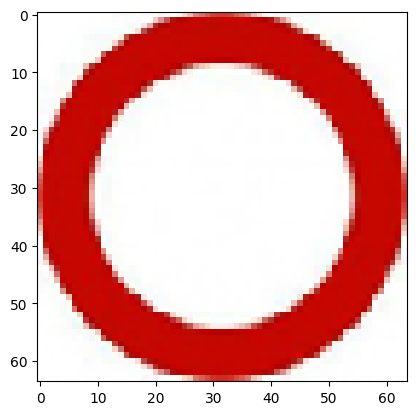

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt
img = load_img('/content/drive/MyDrive/testAIfinal/Dataset_trafficsignsVN/Value/101.jpg', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])